# Can unsupervised clustering help to predict potential patterns indicative of illegal property tax fraud? 

### For most property owners in Texas the yearly notice of property taxes is a major financial obligation. These taxes are compulsory contribution funding local services including police and fire protection, road maintenance, public schools, libraries, hospitals, and similar. Paying these taxes is unavoidable; however, one may be able to lower them if they protest the tax assessed value. There are many businesses that help property owners to protest their taxes. And one fundamental criteria for winning such protest is to prove that one's property is assesd with higher value comapared to other properties with similar features. Usually, those who protest their taxes provide data from recent sales or pictures showing the conditions of the property. There are also many exemptions that property owners can apply for that will reduce their tax bills. These exemptions can be related to one's age, disability, being the primary residence and etc.

In this analysis we are looking at this situation from the taxing authority's side. Here we are using the tax data from Harris County in Texas which is one of the largest counties in the USA. Evey year more than 400,000 property owners protest their taxes and many more apply for exemptions. In such a large community one often experience instances of property tax fraud costing government agencies millions of dollars in lost revenues and driving higher taxes for at-large communities. 

We will use unsupervised clustering techniques that analyzes millions of features recognizing potential patterns and behaviors indicative of illegal property exemption. The ability to proactively identify tax fraud empowers agencies to recover revenues lost through illegal property-based claims and alleviates the pressure of an artificially inflated tax burden on local citizens.

In [1]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import plot, xlabel, ylabel
%matplotlib inline
from matplotlib.path import Path
from matplotlib.figure import Figure
from matplotlib.patches import PathPatch
from matplotlib.patches import Patch
from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas
import matplotlib.cm as cm
from IPython.core.display import display
import matplotlib.patches as patches
import math
import numpy as np
from numpy import percentile
from numpy.random import seed
import os
from sklearn.preprocessing import StandardScaler
import datetime as dt
import time
import re
import pyodbc
import sqlalchemy as sal
from sklearn.preprocessing import normalize 
from sqlalchemy import create_engine
import pandas as pd
from scipy.stats import bartlett
from scipy.stats import boxcox
from sklearn.preprocessing import normalize 
from scipy.stats import jarque_bera
from scipy.stats import levene
from scipy.stats import normaltest
import scipy.stats as stats
from scipy.stats.mstats import winsorize
from scipy.stats import zscore
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_score #
from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics.pairwise import pairwise_distances
from sklearn.metrics import precision_recall_curve
from sklearn import preprocessing as pp
from sklearn.model_selection import train_test_split 
from sklearn.metrics import precision_recall_curve, average_precision_score
from sklearn.metrics import roc_curve, auc, roc_auc_score
import xlsxwriter
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import homogeneity_score, completeness_score, v_measure_score, \
    adjusted_mutual_info_score, adjusted_rand_score
from sklearn.metrics import silhouette_samples,  silhouette_score
from sklearn.metrics.cluster import contingency_matrix

In [2]:
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100) 
pd.set_option('display.max_colwidth', -1) 

<ipython-input-2-ce088603c02e>:3: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


## Below we use SQL Alchemy to get a set of random selection of the dataset 

In [3]:
#   query = """ 
# SELECT TOP (100000) 
# 	   [ACCOUNT]
#       -- ,[TAX_YEAR] ,[MAILTO]
#       ,[MAIL_ADDR_1]
#       -- ,[MAIL_ADDR_2], [MAIL_CITY], 
# 	  , [MAIL_STATE]
# 	  --,[MAIL_ZIP],[MAIL_COUNTRY]
# 	  ,[UNDELIVERABLE]
#       -- ,[STR_PFX] ,[STR_NUM],[STR_NUM_SFX] ,[STR_NAME] ,[STR_SFX] ,[STR_SFX_DIR], [STR_UNIT], 
# 	  ,[SITE_ADDR_1], ,[SITE_ADDR_2], [SITE_ADDR_3], [STATE_CLASS], [SCHOOL_DIST], [MAP_FACET], [KEY_MAP], [NEIGHBORHOOD_CODE]
#       -- ,[NEIGHBORHOOD_GROUP]
#       ,[MARKET_AREA_1]
#       -- ,[MARKET_AREA_1_DSCR]
#       ,[MARKET_AREA_2]
#       -- ,[MARKET_AREA_2_DSCR], [ECON_AREA], [ECON_BLD_CLASS], [CENTER_CODE]
# 	  , [YR_IMPR]
#       -- ,[YR_ANNEXED], [SPLT_DT], [DSC_CD]
#       ,[NXT_BUILDING], [TOTAL_BUILDING_AREA], [TOTAL_LAND_AREA], [ACREAGE]
#       --,[CAP_ACCOUNT], [SHARED_CAD_CODE]
#       ,[LAND_VALUE], [IMPROVEMENT_VALUE]
#       --,[EXTRA_FEATURES_VALUE], [AG_VALUE]
#       ,[ASSESSED_VALUE], [TOTAL_APPRAISED_VALUE], [TOTAL_MARKET_VALUE], [PRIOR_LND_VALUE],[PRIOR_IMPR_VALUE]
#       -- ,[PRIOR_X_FEATURES_VALUE], [PRIOR_AG_VALUE]
#       ,[PRIOR_TOTAL_APPRAISED_VALUE], [PRIOR_TOTAL_MARKET_VALUE]
# 	  --,[NEW_CONSTRUCTION_VALUE]
#       ,[TOTAL_RCN_VALUE]
#       -- ,[VALUE_STATUS], [NOTICED]
#       ,DATENAME(YY, NOTICE_DATE) AS NOTICE_DATE_YEAR, [PROTESTED], DATENAME(YY, LAST_INSPECTED_DATE) AS LAST_INSPECTED_YEAR
#       ,[LAST_INSPECTED_BY], DATENAME(YY, NEW_OWNER_DATE) AS NEW_OWNER_YEAR, DATENAME(MM, NEW_OWNER_DATE) AS NEW_OWNER_MONTH
      # ,[LEGAL_DSCR_1] ,[LEGAL_DSCR_2] ,[LEGAL_DSCR_3] ,[LEGAL_DSCR_4]
#       -- ,[JURS]
#   FROM [master].[dbo].[real_acct]
#   ORDER BY NEWID()
# 	;"""			

In [4]:
# #engine = sal.create_engine('mssql+pyodbc://psqlmc25v01.cnp.int,2018/dswmp?driver=SQL Server?Trusted_Connection=yes')
# engine = sal.create_engine('mssql+pyodbc://5CD0134YG4/master?driver=SQL Server?Trusted_Connection=yes')
# conn = engine.connect()
# df0 = []  # append each chunk df here 
# df0 = pd.read_sql_query(query, conn)
# df0.shape

In [5]:
# # Export a copy as pickle file 
# export_path = 'C:\\dev_data\\re\\hcad'
# path_to_file = export_path+"\\"+ "hcad_sample" + '.pkl'
# df0.to_pickle(path_to_file, protocol=5)

In [6]:
# Import from pickle file
import_path = 'C:\\dev_data\\re\\hcad'
#import_path = 'C:\\Users\\User\\Dropbox\\dev_data\\re\\hcad'
path_to_file = import_path+"\\"+ "hcad_sample" + '.pkl'
df0 = unpickled_df = pd.read_pickle(path_to_file)

In [7]:
df0.shape

(100000, 39)

## Helper functions

In [8]:
############################################# DO NOT DELETE ############################################# 

# Help functions to gather basic descriptions
def describe(df):
    return pd.concat([df.describe().T,
                      df.mad().rename('mean abs dev'),
                      df.skew().rename('skew'),
                      df.kurt().rename('kurt'),
                      df.nunique().rename('unique')
                     ], axis=1).T

def data_type_summary(df):
    # get Object data type summary
    df_stat_object = pd.DataFrame([])
    df_stat_object = df.describe(include = ['O'])
    df_stat_object.loc['dtype'] = df.dtypes
    df_stat_object.loc['size'] = len(df)
    #df_stat_object.loc['% null'] = df.isnull().count().round(2)
    #df_stat_object.loc['% null'] = ((df0.isnull().sum()/df0.shape[0])*100).round(3)
    
    
    # get numerical data type summary
    df_stat_num = pd.DataFrame([])
    df_stat_num = df.describe(include = [np.number])
    df_stat_num.loc['dtype'] = df.dtypes
    df_stat_num.loc['size'] = len(df)
    #df_stat_object.loc['% null'] = df.isnull().count().round(2)
    df_stat_object.loc['% null'] = ((df.isnull().sum()/df0.shape[0])*100).round(3)
    
    # # get date data type summary
    # df_stat_date = df.describe(include = ['datetime64']) 
    # df_stat_date.loc['dtype'] = df.dtypes
    # df_stat_date.loc['size'] = len(df)
    # #df_stat_object.loc['% null'] = df.isnull().count().round(2)
    # #df_stat_object.loc['% null'] = ((df0.isnull().sum()/df0.shape[0])*100).round(3)
    
    result = pd.concat([df_stat_num, df_stat_object], axis=1, sort=False)
    return result

In [9]:
############################################# DO NOT DELETE ############################################# 

def describe_with_nulls(df):
    nan_cols = [i for i in df.columns if df[i].isnull().any()]
    # get Object data type summary
    df_stat_num = pd.DataFrame([])
    #df_stat_num = df0[nan_cols].describe(include = [np.number, 'O', 'datetime64']) 
    df_stat_num = df0[nan_cols].describe(include = [np.number, 'O']) 
    
    df_stat_num.loc['dtype'] = df.dtypes
    df_stat_num.loc['size'] = len(df)
    #df_stat_num.loc['% null'] = df.isnull().count().round(2)
    df_stat_num.loc['% null'] = ((df0.isnull().sum()/df0.shape[0])*100).round(3)
    return df_stat_num

In [10]:
############################################# DO NOT DELETE ############################################# 
# Function to move specific column to the left side for easier view
def move_to_left(df, column_name):
    df= df[ [str(column_name)] + [ col for col in df.columns if col != str(column_name) ] ]
    return df

def move_to_left_get_dup(df, column_name):
    df = df[ [str(column_name)] + [ col for col in df.columns if col != str(column_name) ] ]
    df = df[df.duplicated(str(column_name))]
    return df

In [11]:
# Sample a subset of data
df1 = df0.sample(100000)
df1.shape

(100000, 39)

In [12]:
df1.head(2)

,ACCOUNT,MAIL_ADDR_1,MAIL_STATE,UNDELIVERABLE,SITE_ADDR_1,SITE_ADDR_2,SITE_ADDR_3,STATE_CLASS,SCHOOL_DIST,MAP_FACET,KEY_MAP,NEIGHBORHOOD_CODE,MARKET_AREA_1,MARKET_AREA_2,YR_IMPR,NXT_BUILDING,TOTAL_BUILDING_AREA,TOTAL_LAND_AREA,ACREAGE,LAND_VALUE,IMPROVEMENT_VALUE,ASSESSED_VALUE,TOTAL_APPRAISED_VALUE,TOTAL_MARKET_VALUE,PRIOR_LND_VALUE,PRIOR_IMPR_VALUE,PRIOR_TOTAL_APPRAISED_VALUE,PRIOR_TOTAL_MARKET_VALUE,TOTAL_RCN_VALUE,NOTICE_DATE_YEAR,PROTESTED,LAST_INSPECTED_YEAR,LAST_INSPECTED_BY,NEW_OWNER_YEAR,NEW_OWNER_MONTH,LEGAL_DSCR_1,LEGAL_DSCR_2,LEGAL_DSCR_3,LEGAL_DSCR_4
74631,0941540000053,12718 PEBBLEBROOK DR,TX,N,12718 PEBBLEBROOK DR,HOUSTON,77024,A1,25,4957A,489H,7761.00,391,391,1964,2,2626,9420,.2162,627200,140331,767531,767531,767531,627200,165584,785000,785000,379272,2020,Y,2017,01595,2009,April,LT 53 BLK 5,FONN VILLAS SEC 2,None,None
84836,1065260000012,16202 BOURRELET WAY,TX,N,16202 BOURRELET WAY,CROSBY,77532,A1,05,6064B,419B,2258.00,240,240,2009,1,2087,11169,.2564,38164,178955,217119,217119,217119,28623,184809,210381,213432,203358,2020,N,2019,01767,2010,February,LT 12 BLK 6,NEWPORT SEC 7,None,None


In [13]:
describe_with_nulls(df1)

,MAIL_ADDR_1,MAIL_STATE,SITE_ADDR_2,SITE_ADDR_3,SCHOOL_DIST,MAP_FACET,KEY_MAP,MARKET_AREA_1,MARKET_AREA_2,YR_IMPR,LAND_VALUE,IMPROVEMENT_VALUE,ASSESSED_VALUE,TOTAL_APPRAISED_VALUE,TOTAL_MARKET_VALUE,PRIOR_LND_VALUE,PRIOR_IMPR_VALUE,PRIOR_TOTAL_APPRAISED_VALUE,PRIOR_TOTAL_MARKET_VALUE,TOTAL_RCN_VALUE,NOTICE_DATE_YEAR,LAST_INSPECTED_YEAR,LAST_INSPECTED_BY,NEW_OWNER_YEAR,NEW_OWNER_MONTH,LEGAL_DSCR_1,LEGAL_DSCR_2,LEGAL_DSCR_3,LEGAL_DSCR_4
count,99999,99673,99407,99395,99976,87089,97923,96132,91601,85439,99121,99121,99121,99121,99121,98665,98665,98665,98665,99064,99121,98169,96441,99981,99981,99999,99985,15618,3729
unique,86311,54,47,150,26,1687,2842,298,72,126,45799,69794,77929,76955,78444,44618,69209,72804,73619,65124,1,42,904,55,12,30291,24644,6688,1897
top,PO BOX 1525,TX,HOUSTON,77449,01,5357C,493N,320,320,1983,0,0,0,0,0,0,0,0,0,0,2020,2018,01358,1988,January,LT 1 BLK 1,(NM),(NM),LEASE LAND
freq,1233,96619,61880,2567,32018,295,205,5617,5764,2634,7465,16082,5438,5438,5438,7394,16021,5395,5395,20253,99121,17870,1674,8220,19942,960,1179,775,162
dtype,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object
size,100000,100000,100000,100000,100000,100000,100000,100000,100000,100000,100000,100000,100000,100000,100000,100000,100000,100000,100000,100000,100000,100000,100000,100000,100000,100000,100000,100000,100000
% null,0.001,0.327,0.593,0.605,0.024,12.911,2.077,3.868,8.399,14.561,0.879,0.879,0.879,0.879,0.879,1.335,1.335,1.335,1.335,0.936,0.879,1.831,3.559,0.019,0.019,0.001,0.015,84.382,96.271


## Pre-processing and feature engineering

In [14]:
legal_cols = ['LEGAL_DSCR_1','LEGAL_DSCR_2','LEGAL_DSCR_3','LEGAL_DSCR_4']
date_cols = ['NOTICE_DATE','LAST_INSPECTED_DATE','NEW_OWNER_DATE']
num_cols = ['TOTAL_LAND_AREA', 'TOTAL_BUILDING_AREA', 'ACREAGE', 'LAND_VALUE',\
            'IMPROVEMENT_VALUE', 'ASSESSED_VALUE', 'NXT_BUILDING',\
            'TOTAL_APPRAISED_VALUE', 'TOTAL_MARKET_VALUE', 'PRIOR_LND_VALUE', 'YR_IMPR',\
            'PRIOR_IMPR_VALUE', 'PRIOR_TOTAL_APPRAISED_VALUE', 'PRIOR_TOTAL_MARKET_VALUE', 'TOTAL_RCN_VALUE']
# lower case
df1 = df1.apply(lambda x: x.astype(str).str.lower())
df1[num_cols] = df1[num_cols].apply(pd.to_numeric, errors='coerce') # numeric type
df1[num_cols] = df1[num_cols].fillna(0).astype(float) # important to fill Na before converting ot int
df1['SITE_ADDR_3']= df1['SITE_ADDR_3'].astype(str).str.zfill(5) # fix the zip code
df1['all_legal'] = df1[legal_cols].apply(lambda row: ' '.join(row.values.astype(str)), axis=1) # Combine all legal
df1.drop(legal_cols, axis=1, inplace=True)
df1['UNDELIVERABLE'].replace("n", 0,inplace=True)
df1['UNDELIVERABLE'].replace("y", 1,inplace=True)
df1['PROTESTED'].replace("n", 0,inplace=True)
df1['PROTESTED'].replace("y", 1,inplace=True)

# Calculate $/sqf

df1['land_val_sqf'] = df1['LAND_VALUE']/df1['TOTAL_LAND_AREA']
df1['build_val_sqf'] = df1['IMPROVEMENT_VALUE']/df1['TOTAL_BUILDING_AREA']
df1['tot_appr_val_per_build_sqf'] = df1['TOTAL_APPRAISED_VALUE']/df1['TOTAL_BUILDING_AREA']
df1['tot_mark_val_per_build_sqf'] = df1['TOTAL_MARKET_VALUE']/df1['TOTAL_BUILDING_AREA']

# Filter away very low values
df1 = df1[df1['TOTAL_APPRAISED_VALUE'] >10000 ]
df1 = df1[df1['PRIOR_TOTAL_APPRAISED_VALUE'] >10000 ]
df1 = df1[df1['LAND_VALUE'] >10000 ]

# Add a unique column for concatination using when actual index cannot be used
df1['unique_id'] = np.arange(df1.shape[0])
move_to_left(df1, 'unique_id')
df1['ones'] = 1

In [15]:
# Add sum by groupby for each neigborhood
df1['neighborhood_total'] = df1.groupby('NEIGHBORHOOD_CODE')['ones'].transform('sum')

In [16]:
df1.shape

(86018, 43)

In [17]:
data_type_summary(df1)

,UNDELIVERABLE,YR_IMPR,NXT_BUILDING,TOTAL_BUILDING_AREA,TOTAL_LAND_AREA,ACREAGE,LAND_VALUE,IMPROVEMENT_VALUE,ASSESSED_VALUE,TOTAL_APPRAISED_VALUE,TOTAL_MARKET_VALUE,PRIOR_LND_VALUE,PRIOR_IMPR_VALUE,PRIOR_TOTAL_APPRAISED_VALUE,PRIOR_TOTAL_MARKET_VALUE,TOTAL_RCN_VALUE,PROTESTED,land_val_sqf,build_val_sqf,tot_appr_val_per_build_sqf,tot_mark_val_per_build_sqf,unique_id,ones,neighborhood_total,ACCOUNT,MAIL_ADDR_1,MAIL_STATE,SITE_ADDR_1,SITE_ADDR_2,SITE_ADDR_3,STATE_CLASS,SCHOOL_DIST,MAP_FACET,KEY_MAP,NEIGHBORHOOD_CODE,MARKET_AREA_1,MARKET_AREA_2,NOTICE_DATE_YEAR,LAST_INSPECTED_YEAR,LAST_INSPECTED_BY,NEW_OWNER_YEAR,NEW_OWNER_MONTH,all_legal
count,86018,86018,86018,86018,86018,86018,86018,86018,86018,86018,86018,86018,86018,86018,86018,86018,86018,86018,79471,86018,86018,86018,86018,86018,86018,86018,86018,86018,86018,86018,86018,86018,86018,86018,86018,86018,86018,86018,86018,86018,86018,86018,86018
mean,0.000569648,1854.81,1.75271,3720.59,74303,1.70576,134396,253245,396741,392069,398313,125195,232709,358542,364481,226372,0.305459,inf,inf,inf,inf,43008.5,1,32.6036,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,0.0238606,488.017,0.902768,47815,1.45654e+07,334.374,672202,2.29889e+06,2.89338e+06,2.89331e+06,2.89588e+06,644752,2.18503e+06,2.65639e+06,2.65813e+06,223513,0.460604,NaN,NaN,NaN,NaN,24831.4,0,28.6403,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,0,0,1,0,0,0,10002,0,10062,10062,10062,0,0,10014,10014,0,0,2.29568e-05,0,4.37192,4.37192,0,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,0,1960,1,1344,5664,0.13,28527,83321.8,133016,126248,133133,23832,73833.5,111758,119535,141469,0,3.76226,59.6311,81.6723,84.3399,21504.2,1,11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,0,1981,2,1860,7306,0.1677,39221.5,137718,189066,185935,189196,34006,131132,173028,177000,203460,0,5.35499,74.3667,98.5614,100.412,43008.5,1,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,0,2003,2,2579,9815,0.2253,74706.2,199610,283684,280667,284000,66998.8,192428,267435,271020,270622,1,9.20161,87.8908,131.68,134.126,64512.8,1,45,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,1,2020,56,1.18166e+07,4.26932e+09,98010,5.99766e+07,3.11203e+08,3.57538e+08,3.57538e+08,3.57538e+08,6.04875e+07,2.96947e+08,3.18281e+08,3.18281e+08,1.21189e+07,1,inf,inf,inf,inf,86017,1,169,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
dtype,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,float64,float64,float64,float64,int32,int64,int64,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object
size,86018,86018,86018,86018,86018,86018,86018,86018,86018,86018,86018,86018,86018,86018,86018,86018,86018,86018,86018,86018,86018,86018,86018,86018,86018,86018,86018,86018,86018,86018,86018,86018,86018,86018,86018,86018,86018,86018,86018,86018,86018,86018,86018


In [18]:
# Calculate the ownership age
current_year = dt.datetime.today().year
df1['NEW_OWNER_YEAR'] = pd.to_numeric(df1['NEW_OWNER_YEAR'], errors='coerce').astype('Int64')
df1['new_owner_age']  = current_year - df1['NEW_OWNER_YEAR']

In [19]:
# Function to tag as an absentee
def is_absentee (x):
    return (x['SITE_ADDR_1'][:5] != x['MAIL_ADDR_1'][:5])*1
# Apply the  
df1['SITE_ADDR_1'] = df1['SITE_ADDR_1'].astype(str)
df1['MAIL_ADDR_1'] = df1['MAIL_ADDR_1'].astype(str)
df1['absentee'] = df1.apply(is_absentee, axis=1)
df1.drop(['SITE_ADDR_1','MAIL_ADDR_1'], axis=1, inplace=True)

In [20]:
# Create a dict for state class categories divided into residential and commercial
state_class_dict = {}
state_class_residential = ['a1', 'a2', 'a3', 'b1', 'b2']
state_class_commercial = set(df1['STATE_CLASS']) - set(state_class_residential)

state_class_vals = ['residential', 'commercial']
for key in set(df1['STATE_CLASS']):
    for value in state_class_vals:
        if key in state_class_residential:
            state_class_dict[key] = 'residential'
            #state_class_vals.remove(value) 
        else:
            state_class_dict[key] = 'commercial'


In [21]:
# def map_state_codes(row, state_codes_dict):
#     return values_dict[row]
def map_state_codes(row, values_dict):
    return values_dict.get(row, 0)
    
#state_codes_dict = {'a1': 'residential', 'a2': 'residential','b1': 'residential', 'b2': 'residential','b1': 'residential'}
df1['STATE_CLASS_TYPE'] = df1['STATE_CLASS'].apply(map_state_codes, args = (state_class_dict,))

In [22]:
df2 = df1.copy()

In [23]:
df2.shape

(86018, 44)

In [24]:
# Get object numbers before adding dummy 
df2_obj = df2.select_dtypes(include=['O'])
df2_obj.shape, df2_obj.columns

((86018, 17),
 Index(['ACCOUNT', 'MAIL_STATE', 'SITE_ADDR_2', 'SITE_ADDR_3', 'STATE_CLASS',
        'SCHOOL_DIST', 'MAP_FACET', 'KEY_MAP', 'NEIGHBORHOOD_CODE',
        'MARKET_AREA_1', 'MARKET_AREA_2', 'NOTICE_DATE_YEAR',
        'LAST_INSPECTED_YEAR', 'LAST_INSPECTED_BY', 'NEW_OWNER_MONTH',
        'all_legal', 'STATE_CLASS_TYPE'],
       dtype='object'))

In [25]:
# Categorical list to keep

cat_lst = [
       ##'MAIL_STATE', 'SITE_ADDR_2', 'SITE_ADDR_3', 'STATE_CLASS'
       ##,'SCHOOL_DIST', 'MAP_FACET', 
       ## 'KEY_MAP'
       'NEIGHBORHOOD_CODE'
       ##,'MARKET_AREA_1', 'MARKET_AREA_2', 'NXT_BUILDING', 'NOTICE_DATE_YEAR', 'UNDELIVERABLE',
       ##'LAST_INSPECTED_YEAR', 'LAST_INSPECTED_BY', 'NEW_OWNER_YEAR',
       ##'NEW_OWNER_MONTH','STATE_CLASS_TYPE'
       ]

In [26]:
df2 = df2.drop(['all_legal'], axis=1)

# Get object numbers before adding dummy 
df2_obj = df2.select_dtypes(include=['O'])
df2_obj.shape, df2_obj.columns

((86018, 16),
 Index(['ACCOUNT', 'MAIL_STATE', 'SITE_ADDR_2', 'SITE_ADDR_3', 'STATE_CLASS',
        'SCHOOL_DIST', 'MAP_FACET', 'KEY_MAP', 'NEIGHBORHOOD_CODE',
        'MARKET_AREA_1', 'MARKET_AREA_2', 'NOTICE_DATE_YEAR',
        'LAST_INSPECTED_YEAR', 'LAST_INSPECTED_BY', 'NEW_OWNER_MONTH',
        'STATE_CLASS_TYPE'],
       dtype='object'))

In [27]:
# Get all count of all unique values of categorical data type
pd.unique(df2[df2_obj.columns].values.ravel()).shape

(98562,)

In [28]:
# List the scope of the dataset for a specific range of properties
df2 = df2[df2["STATE_CLASS_TYPE"]=='residential']
df2 = df2[df2["NXT_BUILDING"] ==1]
df2 = df2[df2["TOTAL_BUILDING_AREA"] <= 8000]
df2 = df2[df2["TOTAL_BUILDING_AREA"] > 0]
df2 = df2[df2["TOTAL_LAND_AREA"] <= 50000]
df2 = df2[df2["neighborhood_total"] >= 7]
df2 = df2[df2["TOTAL_MARKET_VALUE"] < 10000000]
df2 = df2[df2["tot_appr_val_per_build_sqf"] <=1000]
df2 = df2[df2["tot_mark_val_per_build_sqf"] <=1000]

In [29]:
df2.shape

(15828, 43)

In [30]:
col = ['TOTAL_BUILDING_AREA', 'TOTAL_LAND_AREA', 'LAND_VALUE', \
        'IMPROVEMENT_VALUE', 'TOTAL_APPRAISED_VALUE', \
        'TOTAL_MARKET_VALUE']

## Preliminary analysis of owners who protested using pair-plot

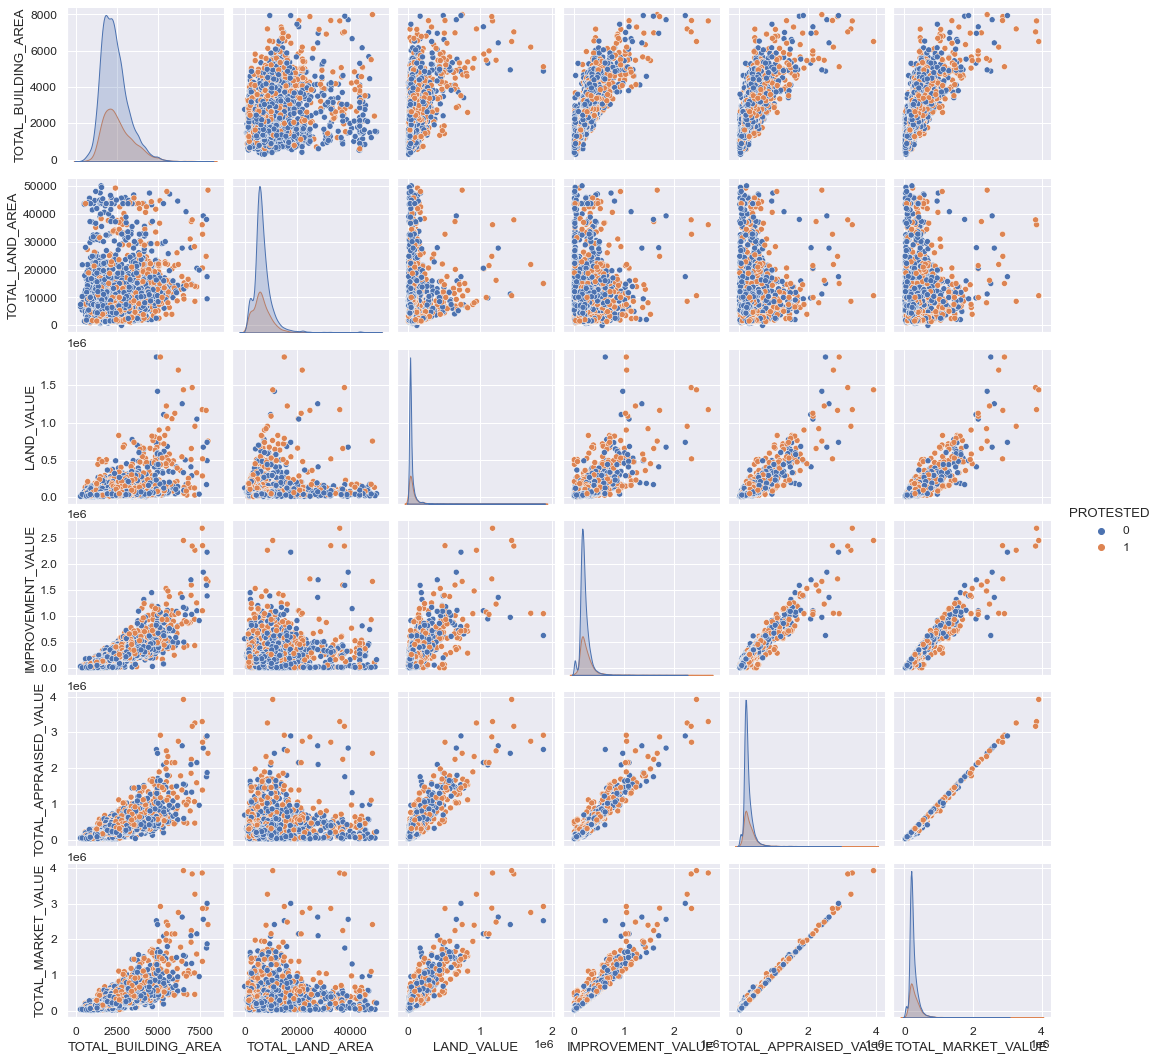

In [31]:
sns.set()
with sns.plotting_context("notebook", font_scale=1.1):
    sns.pairplot(df2 \
        , vars=col, hue='PROTESTED')
plt.show()

## Value per sqf for building vs. land

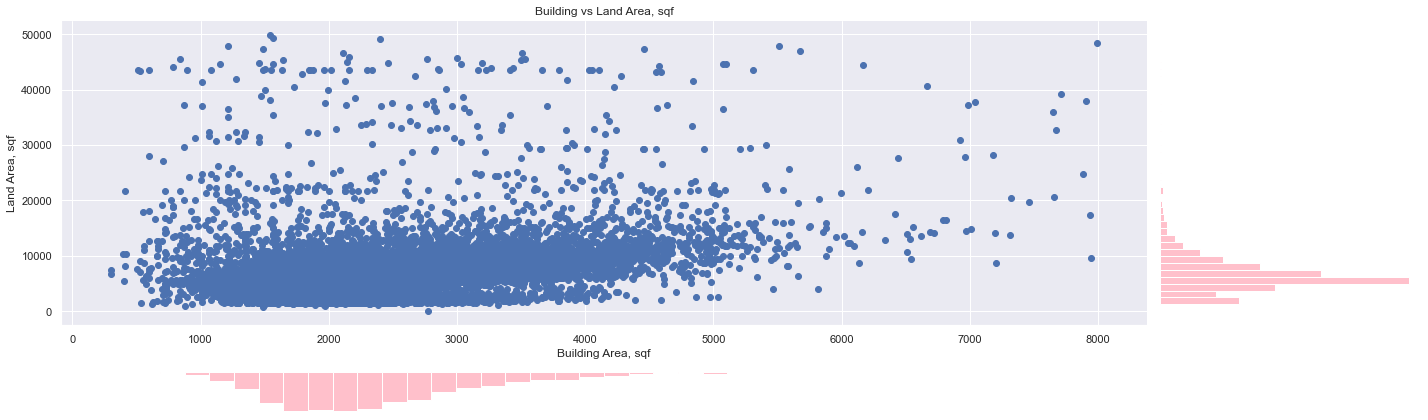

In [32]:
# prepare the data for plotting
# separate x and y
x = df2["TOTAL_BUILDING_AREA"]
y = df2["TOTAL_LAND_AREA"]

# instanciate the figure
fig = plt.figure(figsize = (20, 6))
# in this case we use gridspec.
gs = fig.add_gridspec(5, 5)
ax1 = fig.add_subplot(gs[:4, :-1])

# plot the data
# main axis: scatter plot
ax1.scatter(x, y) #, c = df4.target.astype('category').cat.codes) 

# set the labels for x and y
ax1.set_xlabel("Building Area, sqf")
ax1.set_ylabel("Land Area, sqf")

# set the title for the main plot
ax1.set_title("Building vs Land Area, sqf")

# prettify the plot
# get rid of some of the spines to make the plot nicer
ax1.spines["right"].set_color("None")
ax1.spines["top"].set_color("None")

# using familiar slicing, get the bottom axes and plot
ax2 = fig.add_subplot(gs[4:, :-1])
ax2.hist(x, 40, orientation = 'vertical', color = "pink")

# invert the axis (it looks up side down)
ax2.invert_yaxis()

# prettify the plot
# set the ticks to null
ax2.set_xticks([])
ax2.set_yticks([])
# no axis to make plot nicer
ax2.axison = False

# using familiar slicing, get the left axes and plot
ax3 = fig.add_subplot(gs[:4, -1])
ax3.hist(y, 40, orientation = "horizontal", color = "pink")

# prettify the plot
# set the ticks to null
ax3.set_xticks([])
ax3.set_yticks([])
# no axis to make plot nicer
ax3.axison = False

# make all the figures look nicier
fig.tight_layout()


## Focusing on areas with multiple properties

In [33]:
df2_neighboorhood = df2[df2['neighborhood_total'] >= 30]
df2_neighboorhood = df2_neighboorhood.sort_values(by='neighborhood_total', ascending=False)
df2_neighboorhood.shape

(6501, 43)

Text(0.5, 1.03, 'Neighborhood with multiple properties')

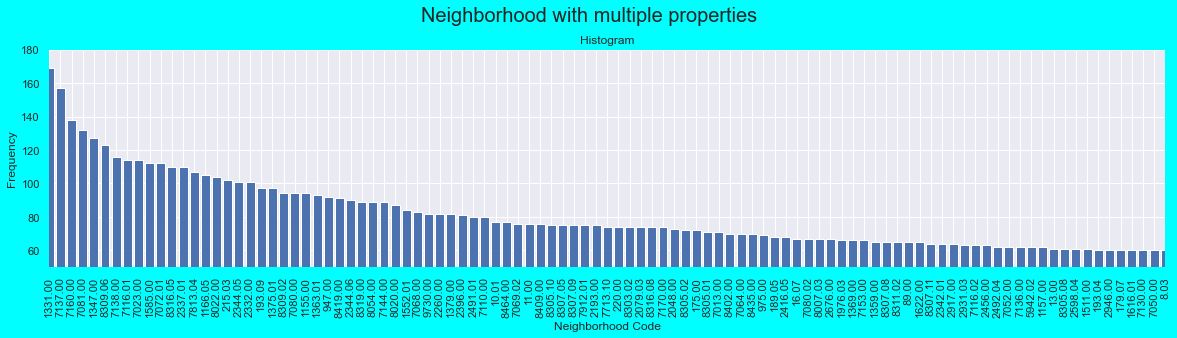

In [34]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(20, 4), linewidth=5, facecolor='cyan')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
x = df2_neighboorhood['NEIGHBORHOOD_CODE']
y = df2_neighboorhood['neighborhood_total']
plt.xticks(rotation='vertical')
ax.bar(x, y)
ax.set(
    xlim=(0, 100), \
    ylim=(50, 180), \
    xlabel='Neighborhood Code', ylabel='Frequency' \
    , title='Histogram')
fig.suptitle('Neighborhood with multiple properties', size=20, y=1.03)

## Discrepancies in land value within same neighborhood

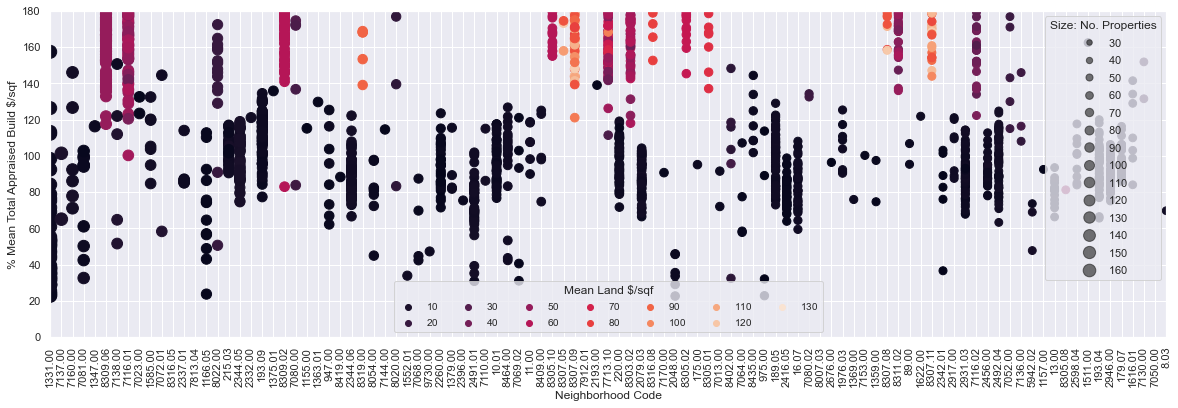

In [35]:
x, y = df2_neighboorhood['NEIGHBORHOOD_CODE'], df2_neighboorhood['tot_appr_val_per_build_sqf']
c, s = df2_neighboorhood['land_val_sqf'], df2_neighboorhood['neighborhood_total']
 
fig, ax = plt.subplots(figsize=(20, 6))
scatter = ax.scatter(x, y, c=c \
    , s=s
    )

# produce a legend with the unique colors from the scatter
legend1 = ax.legend(*scatter.legend_elements(),
                loc ="lower center", title="Mean Land $/sqf", fontsize='small', ncol=7) 
ax.add_artist(legend1)

# produce a legend with a cross section of sizes from the scatter
handles, labels = scatter.legend_elements(prop="sizes", alpha=0.6)
legend2 = ax.legend(handles, labels, loc="upper right", title="Size: No. Properties")

ax.set(xlim=(0, 100), ylim=(0, 180))
plt.xlabel(r'Neighborhood Code')
plt.xticks(rotation='vertical')
plt.ylabel(r'% Mean Total Appraised Build $/sqf')
plt.show()

## Discrepancies in building value within same neighborhood

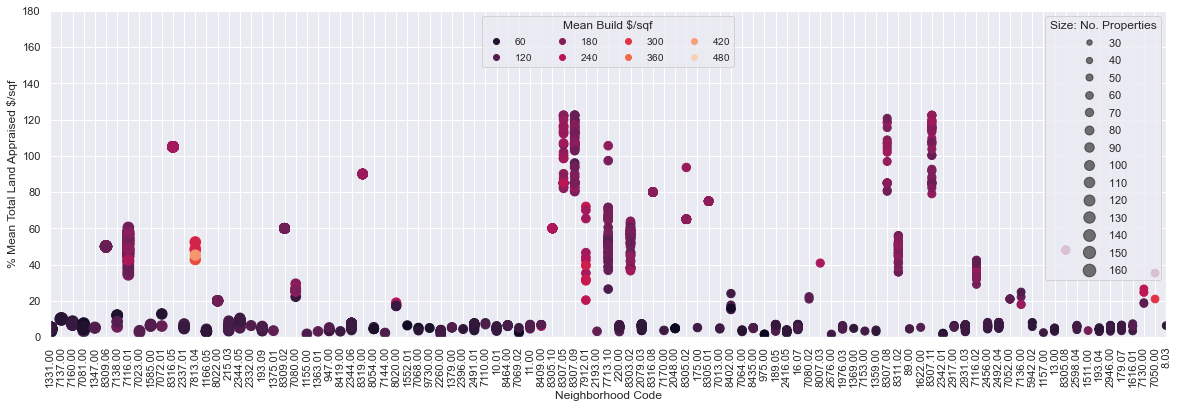

In [36]:
x, y = df2_neighboorhood['NEIGHBORHOOD_CODE'], df2_neighboorhood['land_val_sqf']
c, s = df2_neighboorhood['tot_appr_val_per_build_sqf'], df2_neighboorhood['neighborhood_total']
 
fig, ax = plt.subplots(figsize=(20, 6))
scatter = ax.scatter(x, y, c=c \
    , s=s
    )

# produce a legend with the unique colors from the scatter
legend1 = ax.legend(*scatter.legend_elements(),
                loc ="upper center", title="Mean Build $/sqf", fontsize='small', ncol=4) 
ax.add_artist(legend1)

# produce a legend with a cross section of sizes from the scatter
handles, labels = scatter.legend_elements(prop="sizes", alpha=0.6)
legend2 = ax.legend(handles, labels, loc="upper right", title="Size: No. Properties")
ax.set(xlim=(0, 100), ylim=(0, 180))
plt.xlabel(r'Neighborhood Code')
plt.xticks(rotation='vertical')
plt.ylabel(r'% Mean Total Land Appraised $/sqf')
plt.show()

## Look at central tendencies using groupby

In [37]:
table = pd.pivot_table(df2, index=['NEIGHBORHOOD_CODE'] \
    , values=['PROTESTED','TOTAL_MARKET_VALUE', 'TOTAL_APPRAISED_VALUE', 'PRIOR_TOTAL_APPRAISED_VALUE'\
    , 'TOTAL_BUILDING_AREA', 'TOTAL_LAND_AREA', 'LAND_VALUE' \
    ,'ones'], aggfunc=[np.sum,np.mean], fill_value=0)
table = table.reset_index()
table.columns = table.columns.map('_'.join)

In [38]:
table.shape

(1482, 17)

In [39]:
table = table.drop([
    'sum_PRIOR_TOTAL_APPRAISED_VALUE', 'sum_TOTAL_APPRAISED_VALUE' \
    ,'sum_TOTAL_BUILDING_AREA', 'sum_TOTAL_MARKET_VALUE', 'mean_PROTESTED'\
    ,'sum_TOTAL_BUILDING_AREA','sum_TOTAL_LAND_AREA'
    ,'mean_ones'], axis=1)
table.head()

,NEIGHBORHOOD_CODE_,sum_LAND_VALUE,sum_PROTESTED,sum_ones,mean_LAND_VALUE,mean_PRIOR_TOTAL_APPRAISED_VALUE,mean_TOTAL_APPRAISED_VALUE,mean_TOTAL_BUILDING_AREA,mean_TOTAL_LAND_AREA,mean_TOTAL_MARKET_VALUE
0,1.01,810709,5,23,35248.217391,171426.434783,181890.086957,1839.043478,6449.956522,182385.739130
1,1.04,434263,4,14,31018.785714,191688.785714,200565.071429,1867.357143,6245.357143,200565.071429
2,1.05,688709,7,29,23748.586207,137977.862069,150346.413793,1536.448276,3178.379310,155080.413793
3,1.07,360699,2,12,30058.250000,193071.916667,253914.833333,2643.333333,7188.083333,255349.500000
4,10.01,1488766,10,48,31015.958333,194247.062500,238112.562500,2500.041667,6583.395833,239326.020833


In [40]:
# Calculate some metrics
table['percent_protested'] = ((table['sum_PROTESTED'] / table['sum_ones']) * 100).round()
table['mean_market_excess_val'] = table['mean_TOTAL_MARKET_VALUE'] - table['mean_TOTAL_APPRAISED_VALUE']
table['mean_appraised_1yr_delta_val'] = table['mean_TOTAL_APPRAISED_VALUE'] - table['mean_PRIOR_TOTAL_APPRAISED_VALUE']
table['mean_appraised_per_sqf'] = table['mean_TOTAL_APPRAISED_VALUE'] / table['mean_TOTAL_BUILDING_AREA']
table['mean_land_val_per_sqf'] = table['mean_TOTAL_LAND_AREA'] / table['mean_TOTAL_BUILDING_AREA']
table = move_to_left(table, 'NEIGHBORHOOD_CODE_')
table = table[table['sum_ones'] >=10] # Focus on neighborhood with multiple properties
table = table.sort_values('mean_TOTAL_MARKET_VALUE', ascending=False)


In [41]:
table.shape

(574, 15)

In [42]:
table.columns

Index(['NEIGHBORHOOD_CODE_', 'sum_LAND_VALUE', 'sum_PROTESTED', 'sum_ones',
       'mean_LAND_VALUE', 'mean_PRIOR_TOTAL_APPRAISED_VALUE',
       'mean_TOTAL_APPRAISED_VALUE', 'mean_TOTAL_BUILDING_AREA',
       'mean_TOTAL_LAND_AREA', 'mean_TOTAL_MARKET_VALUE', 'percent_protested',
       'mean_market_excess_val', 'mean_appraised_1yr_delta_val',
       'mean_appraised_per_sqf', 'mean_land_val_per_sqf'],
      dtype='object')

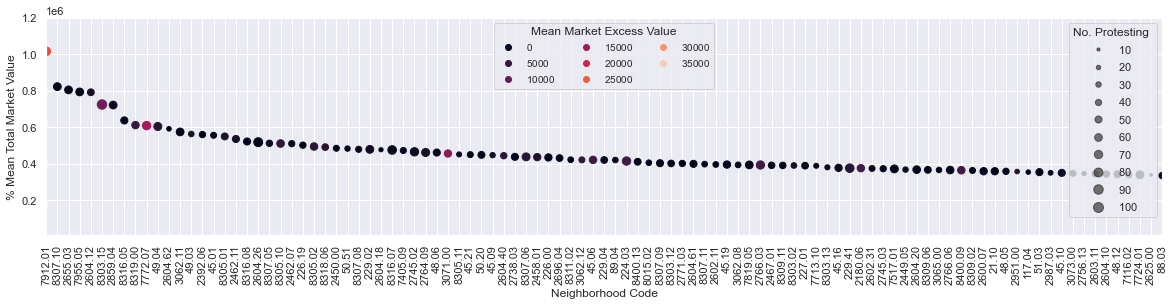

In [43]:
x, y = table['NEIGHBORHOOD_CODE_'], table['mean_TOTAL_MARKET_VALUE']
c, s = table['mean_market_excess_val'], table['percent_protested']
 
fig, ax = plt.subplots(figsize=(20, 4))
scatter = ax.scatter(x, y, c=c \
    , s=s
    )

# produce a legend with the unique colors from the scatter
legend1 = ax.legend(*scatter.legend_elements(),
                loc="upper center", title="Mean Market Excess Value", fontsize='small', ncol=3)               
ax.add_artist(legend1)

# produce a legend with a cross section of sizes from the scatter
handles, labels = scatter.legend_elements(prop="sizes", alpha=0.6)
legend2 = ax.legend(handles, labels, loc="upper right", title="No. Protesting ")
ax.set(xlim=(0, 100), ylim=(10000, 1200000))
plt.xlabel(r'Neighborhood Code')
plt.xticks(rotation='vertical')
plt.ylabel(r'% Mean Total Market Value')
plt.show()

In [44]:
data_type_summary(df2)

,UNDELIVERABLE,YR_IMPR,NXT_BUILDING,TOTAL_BUILDING_AREA,TOTAL_LAND_AREA,ACREAGE,LAND_VALUE,IMPROVEMENT_VALUE,ASSESSED_VALUE,TOTAL_APPRAISED_VALUE,TOTAL_MARKET_VALUE,PRIOR_LND_VALUE,PRIOR_IMPR_VALUE,PRIOR_TOTAL_APPRAISED_VALUE,PRIOR_TOTAL_MARKET_VALUE,TOTAL_RCN_VALUE,PROTESTED,NEW_OWNER_YEAR,land_val_sqf,build_val_sqf,tot_appr_val_per_build_sqf,tot_mark_val_per_build_sqf,unique_id,ones,neighborhood_total,new_owner_age,absentee,ACCOUNT,MAIL_STATE,SITE_ADDR_2,SITE_ADDR_3,STATE_CLASS,SCHOOL_DIST,MAP_FACET,KEY_MAP,NEIGHBORHOOD_CODE,MARKET_AREA_1,MARKET_AREA_2,NOTICE_DATE_YEAR,LAST_INSPECTED_YEAR,LAST_INSPECTED_BY,NEW_OWNER_MONTH,STATE_CLASS_TYPE
count,15828,15828,15828,15828,15828,15828,15828,15828,15828,15828,15828,15828,15828,15828,15828,15828,15828,15828,15828,15828,15828,15828,15828,15828,15828,15828,15828,15828,15828,15828,15828,15828,15828,15828,15828,15828,15828,15828,15828,15828,15828,15828,15828
mean,6.31792e-05,2009.05,1,2408.48,6977.1,0.160172,56360.7,213177,270631,268392,270631,52289,196023,246729,249186,244211,0.284622,2013.4,inf,86.6408,109.309,110.355,43377.4,1,32.6875,6.60033,0.181261,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,0.00794853,9.04988,0,861.182,4721.17,0.108384,71421.6,125735,183039,180946,183039,70902.1,126872,179749,180864,140728,0.451249,5.00444,NaN,26.7342,40.7008,40.8425,24895,0,25.9364,5.00444,0.385246,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,0,1890,1,300,0,0,10020,100,15084,12540,15084,134,0,10500,10500,0,0,1986,0.382901,0.0510204,7.773,10.9534,1,1,7,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,0,2005,1,1795,4931.75,0.1132,29306.8,149610,181099,178906,181099,24860,136668,161053,164340,171692,0,2010,4.66188,73.9582,87.8258,88.6753,21727.8,1,13,3,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,0,2009,1,2258,6052.5,0.139,37045,186034,224664,223115,224664,33000,175837,207012,208899,212146,0,2015,5.87181,83.5868,100.713,101.56,43536,1,24,5,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,0,2015,1,2846,8027,0.1843,56626.5,247478,311100,310239,311100,52095.8,235856,292113,293921,281301,1,2017,7.7,95.2704,117.16,117.855,64888.2,1,44,10,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,1,2019,1,7995,49920,1.146,1.875e+06,2.68164e+06,3.91841e+06,3.91841e+06,3.91841e+06,1.875e+06,2.33816e+06,3.7615e+06,3.7615e+06,2.78833e+06,1,2020,inf,375.658,601.722,601.722,86001,1,169,34,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
dtype,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,Int64,float64,float64,float64,float64,int32,int64,int64,Int64,int64,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object
size,15828,15828,15828,15828,15828,15828,15828,15828,15828,15828,15828,15828,15828,15828,15828,15828,15828,15828,15828,15828,15828,15828,15828,15828,15828,15828,15828,15828,15828,15828,15828,15828,15828,15828,15828,15828,15828,15828,15828,15828,15828,15828,15828


In [45]:
df3 = df2.copy()

## Add dummy variables for some categorical data 

In [46]:
df3.dropna(inplace=True)

In [47]:
df1.shape, df2.shape, df3.shape

((86018, 44), (15828, 43), (15828, 43))

In [48]:
# Add categorical data of Neighborhood Code as binary
df3 = pd.get_dummies(data= df3, columns=["NEIGHBORHOOD_CODE"], prefix='neig_code')
df3.columns = df3.columns.str.replace(".", "_")

In [49]:
# df2 = move_to_left(df2, 'NEIGHBORHOOD_CODE')

In [50]:
df1.shape, df2.shape, df3.shape

((86018, 44), (15828, 43), (15828, 1524))

In [51]:
df3.head(1)

,ACCOUNT,MAIL_STATE,UNDELIVERABLE,SITE_ADDR_2,SITE_ADDR_3,STATE_CLASS,SCHOOL_DIST,MAP_FACET,KEY_MAP,MARKET_AREA_1,MARKET_AREA_2,YR_IMPR,NXT_BUILDING,TOTAL_BUILDING_AREA,TOTAL_LAND_AREA,ACREAGE,LAND_VALUE,IMPROVEMENT_VALUE,ASSESSED_VALUE,TOTAL_APPRAISED_VALUE,TOTAL_MARKET_VALUE,PRIOR_LND_VALUE,PRIOR_IMPR_VALUE,PRIOR_TOTAL_APPRAISED_VALUE,PRIOR_TOTAL_MARKET_VALUE,TOTAL_RCN_VALUE,NOTICE_DATE_YEAR,PROTESTED,LAST_INSPECTED_YEAR,LAST_INSPECTED_BY,NEW_OWNER_YEAR,NEW_OWNER_MONTH,land_val_sqf,build_val_sqf,tot_appr_val_per_build_sqf,tot_mark_val_per_build_sqf,unique_id,ones,neighborhood_total,new_owner_age,absentee,STATE_CLASS_TYPE,neig_code_1_01,neig_code_1_04,neig_code_1_05,neig_code_1_07,neig_code_10_01,neig_code_10_03,neig_code_10_08,neig_code_10_10,...,neig_code_847_00,neig_code_849_00,neig_code_857_00,neig_code_860_00,neig_code_862_00,neig_code_862_02,neig_code_862_03,neig_code_87_09,neig_code_878_00,neig_code_879_00,neig_code_88_03,neig_code_883_00,neig_code_886_00,neig_code_89_00,neig_code_89_04,neig_code_890_00,neig_code_891_00,neig_code_893_00,neig_code_90_00,neig_code_901_00,neig_code_901_01,neig_code_901_05,neig_code_91_00,neig_code_913_01,neig_code_9143_01,neig_code_922_00,neig_code_923_00,neig_code_93_08,neig_code_93_21,neig_code_940_00,neig_code_941_00,neig_code_9410_02,neig_code_943_00,neig_code_944_00,neig_code_945_00,neig_code_945_01,neig_code_946_00,neig_code_947_00,neig_code_947_06,neig_code_949_00,neig_code_949_05,neig_code_951_05,neig_code_954_00,neig_code_955_00,neig_code_958_00,neig_code_965_00,neig_code_966_00,neig_code_967_00,neig_code_9730_00,neig_code_975_00
84836,1065260000012,tx,0,crosby,77532,a1,05,6064b,419b,240,240,2009.0,1.0,2087.0,11169.0,0.2564,38164.0,178955.0,217119.0,217119.0,217119.0,28623.0,184809.0,210381.0,213432.0,203358.0,2020,0,2019,01767,2010,february,3.416958,85.747484,104.03402,104.03402,1,1,52,10,0,residential,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## Split the data into training, test and validation

### The label data is only use to validate the unsupervised result and is not used in the training

In [52]:
# Select size=size from subset of a
np.random.seed(123)
indices = np.random.choice(a=15000, size=3000, replace=False)

# Y is the target variable
numerics = ['int_', 'int8', 'uint8', 'int16', 'int32', 'int64', 'float16', 'float32', 'float64']

Y = df3['PROTESTED']
X = df3[df3.columns.difference(['absentee'])]
X_num = X.select_dtypes(include=numerics)
X_col_names = X_num.columns
X = X[X_col_names]
Y = Y.iloc[indices]
X = X.iloc[indices]

# numerics = ['int_', 'int8', 'uint8', 'int16', 'int32', 'int64', 'float16', 'float32', 'float64']
# df7_num = df7.select_dtypes(include=numerics)
#X = df3.drop(['UNDELIVERABLE'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 465)
X_train, X_validation, y_train, y_validation   = train_test_split(X_train, y_train, test_size=0.25, random_state=465)

train_index = range(0,len(X_train))
validation_index = range(len(X_train),len(X_train)+len(X_validation))
test_index = range(len(X_train)+len(X_validation), len(X_train)+len(X_validation)+len(X_test))

print("df0.shape:{}, df1.shape:{}, df2.shape:{}, df3.shape:{}, X.shape:{}, Y.shape:{}, X_train.shape:{}, X_test.shape:{}, y_train.shape:{}, y_test.shape{}, y_val.shape{}".format(df0.shape, df1.shape, df2.shape, df3.shape, X.shape, Y.shape, X_train.shape, X_test.shape, y_train.shape, y_test.shape, y_validation.shape))

df0.shape:(100000, 39), df1.shape:(86018, 44), df2.shape:(15828, 43), df3.shape:(15828, 1524), X.shape:(3000, 1508), Y.shape:(3000,), X_train.shape:(1800, 1508), X_test.shape:(600, 1508), y_train.shape:(1800,), y_test.shape(600,), y_val.shape(600,)


## Use of PSA with Kmeans

## Find the optimum components for the PCA

In [53]:
time_start = time.time()
n_components = 2
whiten = False
random_state = 2020
pca2 = PCA(n_components=n_components, random_state=random_state)
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
pca2 = PCA().fit(X_train_std)
print('Time elapsed: {} seconds'.format(time.time()-time_start))

Time elapsed: 1.9169986248016357 seconds


In [54]:
# time_start = time.time()
# print('Time elapsed: {} seconds'.format(time.time()-time_start))

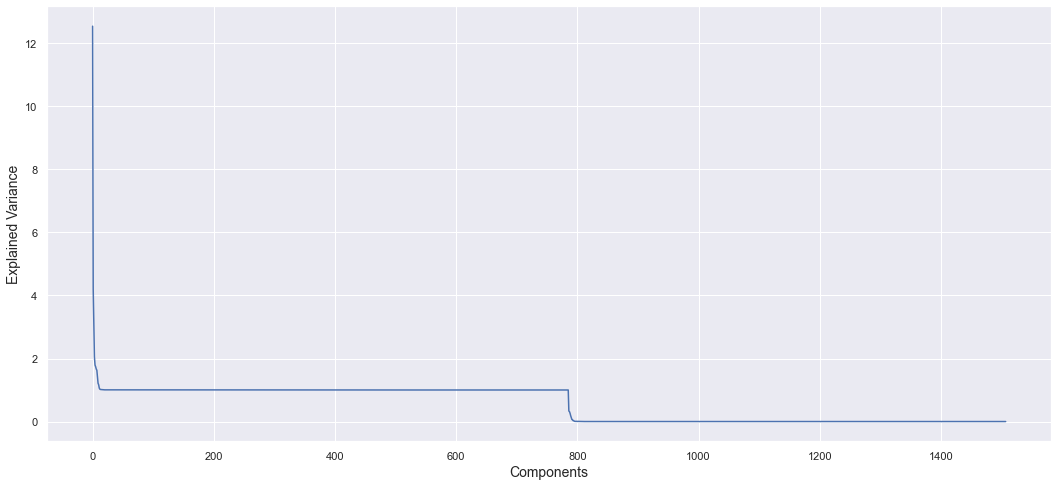

In [55]:

fig, ax = plt.subplots(figsize=(18, 8))
ax.plot(pca2.explained_variance_)
ax.set_xlabel('Components', fontsize=14)
ax.set_ylabel('Explained Variance', fontsize=14)
plt.show()

## Use PCA with optimal n-components

In [56]:
time_start = time.time()
n_components = 2
whiten = False
random_state = 2020
pca = PCA(n_components=n_components, random_state=random_state)
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_train_std_PCA = pca.fit_transform(X_train_std)
df_train_std_PCA = pd.DataFrame(X_train_std_PCA, index=X_train.index)# columns=['x', 'y'], 
dff = pd.concat([X_train, df_train_std_PCA], axis=1)

print('Time elapsed: {} seconds'.format(time.time()-time_start))

Time elapsed: 0.24795794486999512 seconds


## # Compute the optimum inertia for kmeans

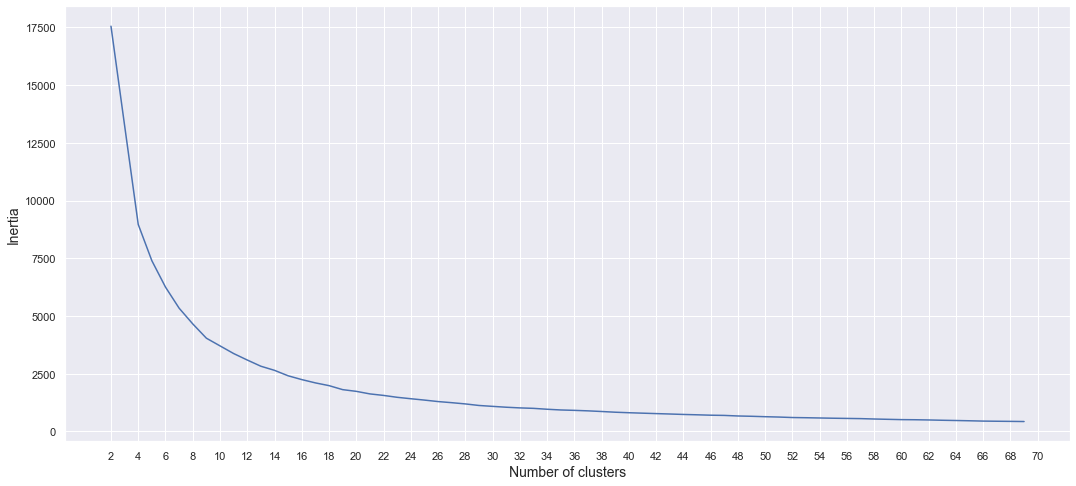

In [57]:
inertias = []
init='k-means++'

for i in range(2, 70):
    km = KMeans(n_clusters=i, max_iter=1000, random_state=1000)
    km.fit(X_train_std_PCA )
    inertias.append(km.inertia_)

# Show the plot inertia vs. no. clusters
fig, ax = plt.subplots(figsize=(18, 8))
ax.plot(np.arange(2, 70, 1), inertias)
ax.set_xlabel('Number of clusters', fontsize=14)
ax.set_ylabel('Inertia', fontsize=14)
ax.set_xticks(np.arange(2, 71, 2))
plt.show()

In [58]:
# Check if any infinit or nan values may stop the fitting later
np.isnan(X_train_std_PCA.any()), np.isfinite(X_train_std_PCA.all()), #np.isnan(dff.any()), np.isfinite(dff.all())

(False, True)

In [59]:
X_train_std_PCA.shape, X_train.shape, dff.shape

((1800, 2), (1800, 1508), (1800, 1510))

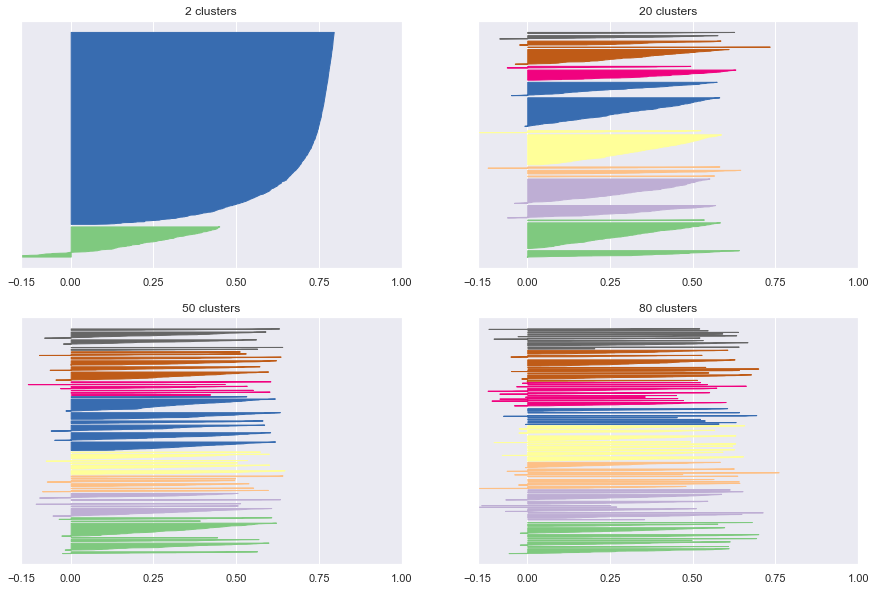

Time elapsed: 1.8643949031829834 seconds


In [60]:

time_start = time.time()
n_clusters = [2, 20, 50, 80]
mapping = [(0, 0), (0, 1), (1, 0), (1, 1)]

km_inertia = []
silhouette_sc = []
# Show the silhouette plots
fig, ax = plt.subplots(2, 2, figsize=(15, 10))

for i, n in enumerate(n_clusters):
    km = KMeans(n_clusters=n, random_state=1000)
    y_pred = km.fit_predict(X_train_std_PCA)
    df_km = pd.DataFrame(y_pred, columns=['prediction'], index=X_train.index)
    dff = pd.concat([dff, df_km], axis=1)
    km_inertia.append((n, km.inertia_))
    silhouette_sc.append((n, silhouette_score(X_train_std_PCA, df_km['prediction'])))
   
    silhouette_values = silhouette_samples(X_train_std_PCA, df_km['prediction'])

    ax[mapping[i]].set_xticks([-0.15, 0.0, 0.25, 0.5, 0.75, 1.0])
    ax[mapping[i]].set_yticks([])
    ax[mapping[i]].set_title('%d clusters' % n)
    ax[mapping[i]].set_xlim([-0.15, 1])
    y_lower = 20

    for t in range(n):
        ct_values = silhouette_values[y_pred == t]
        ct_values.sort()

        y_upper = y_lower + ct_values.shape[0]

        color = cm.Accent(float(t) / n)
        ax[mapping[i]].fill_betweenx(np.arange(y_lower, y_upper), 0, ct_values, facecolor=color, edgecolor=color)

        y_lower = y_upper + 20

plt.show()

print('Time elapsed: {} seconds'.format(time.time()-time_start))

## Measure the performance of clusters 

Text(0.5, 1.0, 'Silhouetter Score Curve')

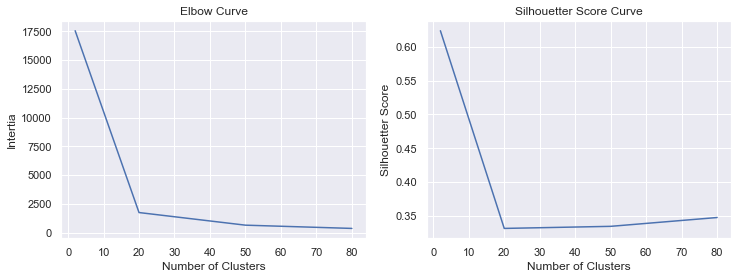

In [61]:
fig, ax = plt.subplots(1,2, figsize=(12,4))
# Plotting Elbow Curve
x_iner = [x[0] for x in km_inertia]
y_iner  = [x[1] for x in km_inertia]
ax[0].plot(x_iner, y_iner)
ax[0].set_xlabel('Number of Clusters')
ax[0].set_ylabel('Intertia')
ax[0].set_title('Elbow Curve')
# Plotting Silhouetter Score
x_sil = [x[0] for x in silhouette_sc]
y_sil  = [x[1] for x in silhouette_sc]
ax[1].plot(x_sil, y_sil)
ax[1].set_xlabel('Number of Clusters')
ax[1].set_ylabel('Silhouetter Score')
ax[1].set_title('Silhouetter Score Curve')

## Pick optimal number of clusters and calcualtes all performance metrics  

In [62]:
# Use PCA with optimal n-components
time_start = time.time()
km = KMeans(n_clusters=20, max_iter=1000, random_state=1000)
y_pred = km.fit_predict(X_train_std_PCA)
df_km = pd.DataFrame(y_pred, columns=['prediction'], index=X_train.index)
kmdff = pd.concat([X_train, df_km], axis=1)
print('Silhouette Score: {}'.format(silhouette_score(X_train_std_PCA, kmdff['prediction']).round(2)))
print('Completeness: {}'.format(completeness_score(kmdff['PROTESTED'], kmdff['prediction']).round(2)))
print('Homogeneity: {}'.format(homogeneity_score(kmdff['PROTESTED'], kmdff['prediction']).round(2)))
print('V-Score: {}'.format(v_measure_score(kmdff['PROTESTED'], kmdff['prediction']).round(2)))
print('Adj. Mutual info: {}'.format(adjusted_mutual_info_score(kmdff['PROTESTED'], kmdff['prediction']).round(2)))
print('Adj. Rand score: {}'.format(adjusted_rand_score(kmdff['PROTESTED'], kmdff['prediction'])))

print('Time elapsed: {} seconds'.format(time.time()-time_start))


Silhouette Score: 0.33
Completeness: 0.01
Homogeneity: 0.05
V-Score: 0.02
Adj. Mutual info: 0.02
Adj. Rand score: 0.014067194529876524
Time elapsed: 0.21147608757019043 seconds


# DBSCAN Custering

## Use t-SNE to reduce the dimentionality 

In [63]:
from sklearn.manifold import TSNE
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)

tsne = TSNE(n_components=2, perplexity=15, random_state=1000)
X_train_tsne = tsne.fit_transform(X_train_std)

df_tsne = pd.DataFrame(X_train_tsne, columns=['x', 'y'], index=X_train.index) 
dff1 = pd.concat([X_train, df_tsne], axis=1)

## t-SNE visualization: Is there any relationship between value/sqf and the property tax being protested or not

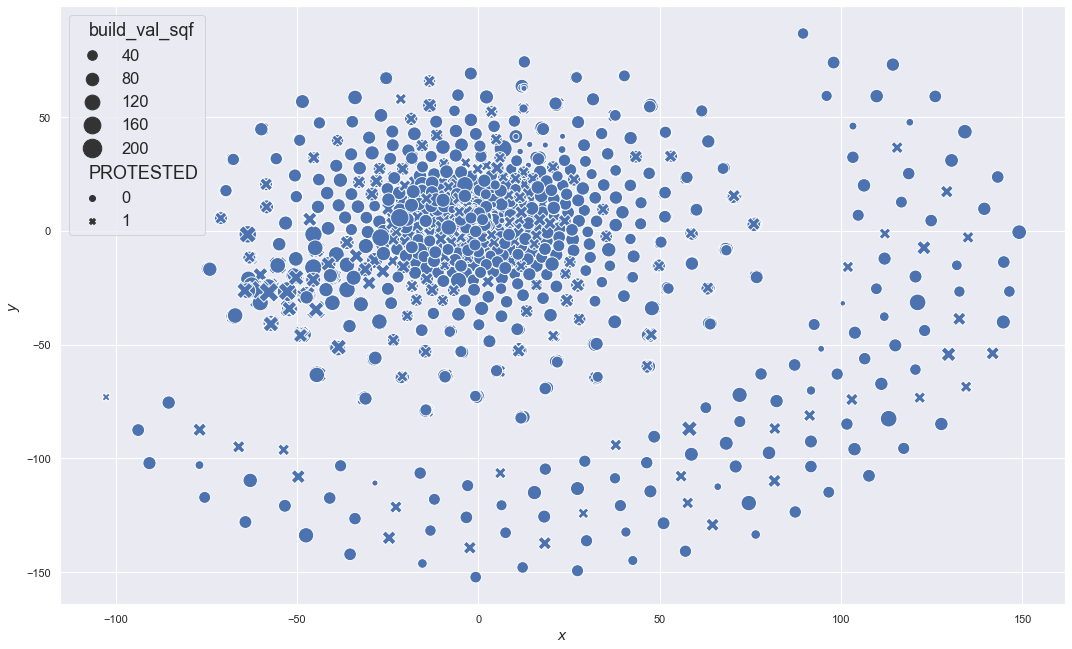

In [64]:
sns.set()

fig, ax = plt.subplots(figsize=(18, 11))

with sns.plotting_context("notebook", font_scale=1.5):
    sns.scatterplot(x='x',
    y='y',
    size='build_val_sqf',
    sizes=(30, 400),
    style='PROTESTED',
    palette=sns.color_palette("tab10", 2),
    data=dff1,
    ax=ax)

ax.set_xlabel(r'$x$', fontsize=14)
ax.set_ylabel(r'$y$', fontsize=14)

plt.show()

## Use of DBSCAN

In [65]:
dst = DBSCAN(eps=15, min_samples=3, metric='minkowski', p=2)
Y_pred_t = dst.fit_predict(X_train_tsne)
silhouette_score(dff1, Y_pred_t, metric='minkowski', p=2)

-0.11738409035683758

In [66]:
from sklearn import metrics 

In [67]:
# Find the best epsilon 
eps_grid = np.linspace(0.3, 1.2, num=10) 
silhouette_scores = [] 
eps_best = eps_grid[0] 
silhouette_score_max = -1 
model_best = None 
labels_best = None

In [68]:
X_train_tsne_array = np.array(X_train_tsne)
for eps in eps_grid: 
    # Train DBSCAN clustering model 
    model = DBSCAN(eps=eps, min_samples=5).fit(X_train_tsne_array) 
 
    # Extract labels 
    labels = model.labels_
    
    # Extract performance metric  
    silhouette_score = round(metrics.silhouette_score(X_train_tsne_array, labels), 4) 
    silhouette_scores.append(silhouette_score) 
    print("Epsilon:", eps, " --> silhouette score:", silhouette_score) 
    
    # Store the best score and its associated epsilon value
    if silhouette_score > silhouette_score_max: 
        silhouette_score_max = silhouette_score 
        eps_best = eps 
        model_best = model 
        labels_best = labels

Epsilon: 0.3  --> silhouette score: -0.4026
Epsilon: 0.39999999999999997  --> silhouette score: -0.5027
Epsilon: 0.5  --> silhouette score: -0.4803
Epsilon: 0.6  --> silhouette score: -0.3617
Epsilon: 0.7  --> silhouette score: -0.2065
Epsilon: 0.7999999999999999  --> silhouette score: -0.1713
Epsilon: 0.8999999999999999  --> silhouette score: -0.1663
Epsilon: 1.0  --> silhouette score: -0.1562
Epsilon: 1.0999999999999999  --> silhouette score: -0.1522
Epsilon: 1.2  --> silhouette score: -0.1498


Best epsilon = 1.2


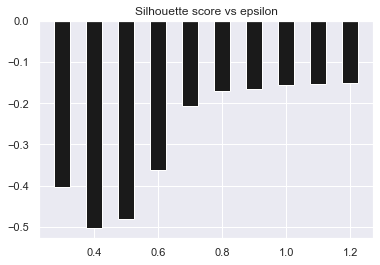

In [69]:
# Plot silhouette scores vs epsilon 
plt.figure() 
plt.bar(eps_grid, silhouette_scores, width=0.05, color='k', align='center') 
plt.title('Silhouette score vs epsilon') 
 
# Best params 
print("Best epsilon =", eps_best) 

In [70]:
# Store the associated model and labels for best epsilon 
model = model_best  
labels = labels_best

# Check for unassigned datapoints in the labels 
offset = 0 
if -1 in labels: 
    offset = 1 
    
# Number of clusters in the data  
num_clusters = len(set(labels)) - offset  
 
print("Estimated number of clusters =", num_clusters)

Estimated number of clusters = 84


In [71]:
# Extracts the core samples from the trained model 
mask_core = np.zeros(labels.shape, dtype=np.bool) 
mask_core[model.core_sample_indices_] = True 

In [72]:
# Plot resultant clusters  
from itertools import cycle 
plt.figure() 
labels_uniq = set(labels) 
markers = cycle('vo^s<>') 

<Figure size 432x288 with 0 Axes>

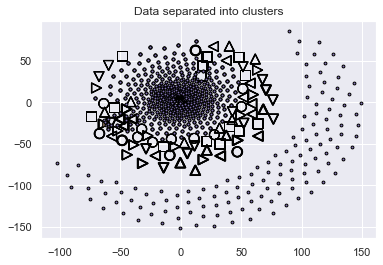

In [73]:
for cur_label, marker in zip(labels_uniq, markers): 
    # Use black dots for unassigned datapoints 
    if cur_label == -1: 
        marker = '.' 
 
    # Create mask for the current label 
    cur_mask = (labels == cur_label) 
 
    cur_data = X_train_tsne_array[cur_mask & mask_core] 
    plt.scatter(cur_data[:, 0], cur_data[:, 1], marker=marker, 
             edgecolors='black', s=96, facecolors='none') 
    cur_data = X_train_tsne_array[cur_mask & ~mask_core] 
    plt.scatter(cur_data[:, 0], cur_data[:, 1], marker=marker, 
             edgecolors='black', s=32) 

plt.title('Data separated into clusters') 
plt.show()

# Hierarchical Clustering 

In [74]:
def plot_clustered_dataset(X, Y):
    fig, ax = plt.subplots(1, 1, figsize=(10, 8))

    ax.grid()
    ax.set_xlabel('X')
    ax.set_ylabel('Y')

    markers = ['o', 'd', '^', 'x', '1', '2', '3', 's']
    colors = ['r', 'b', 'g', 'c', 'm', 'k', 'y', '#cccfff']

    for i in range(X.shape[0]):
        ax.scatter(X[i, 0], X[i, 1], marker=markers[Y[i]], color=colors[Y[i]])

    plt.show()

# For reproducibility
np.random.seed(1000)

nb_samples = 3000

## Visualize the data

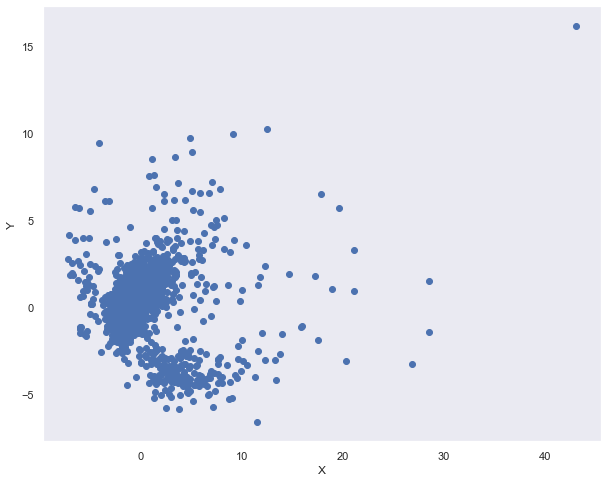

In [75]:
# Show the dataset
fig, ax = plt.subplots(1, 1, figsize=(10, 8))

ax.grid()
ax.set_xlabel('X')
ax.set_ylabel('Y')

ax.scatter(X_train_std_PCA[:, 0], X_train_std_PCA[:, 1], marker='o', color='b')
plt.show()

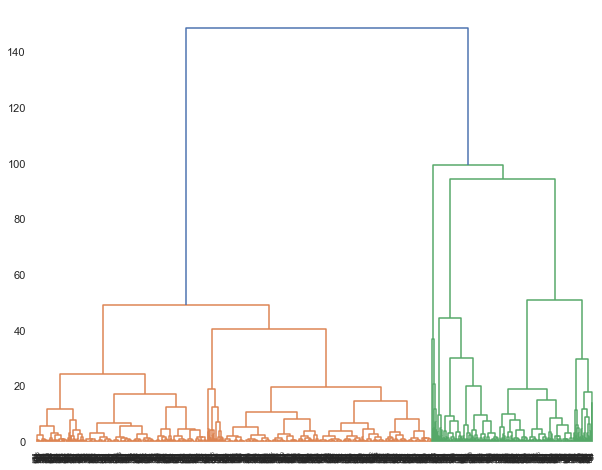

In [76]:
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
# Compute the distance matrix
Xdist = pdist(X_train_std_PCA, metric='euclidean')

# Compute the linkage
Xl = linkage(Xdist, method='ward')

# Compute and show the dendrogram
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
Xd = dendrogram(Xl)
plt.show()

### Pick a proper number of clustering

Silhouette score (Complete): 0.226
Adjusted Rand score (Complete): 0.035


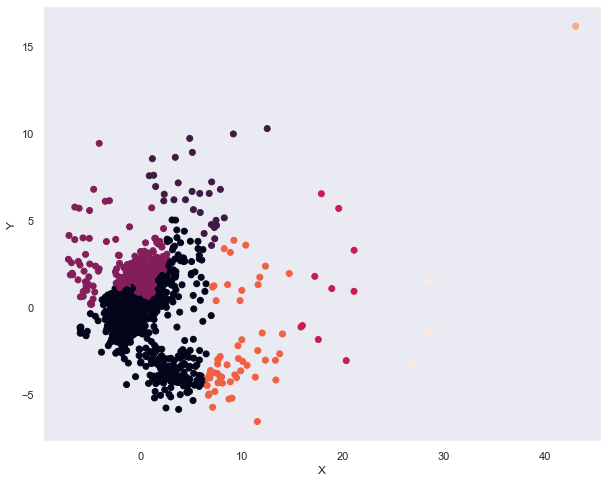

In [77]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score, adjusted_rand_score

ac = AgglomerativeClustering(n_clusters=7, linkage='complete')
Y_pred = ac.fit_predict(X_train_std_PCA)

print('Silhouette score (Complete): %.3f' % silhouette_score(X_train_std_PCA, Y_pred))
print('Adjusted Rand score (Complete): %.3f' % adjusted_rand_score(y_train, Y_pred))

fig, ax = plt.subplots(1, 1, figsize=(10, 8))

ax.grid()
ax.set_xlabel('X')
ax.set_ylabel('Y')

markers = ['o', 'd', '^', 'x', '1', '2', '3', 's']
colors = ['r', 'b', 'g', 'c', 'm', 'k', 'y', '#cccfff']
col_labels = list(set(ac.labels_))

plt.scatter(X_train_std_PCA[:, 0], X_train_std_PCA[:, 1], c=ac.labels_)#, marker=markers[y_train[i]], color=colors[y_train[i]])
plt.show()